# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
#reading data in pandas DataFrame
json_data = pd.read_json('world_bank_projects.json')

### 1. Find the 10 countries with most projects 
I am using three different columns ('countryname', 'countrycode', 'countryshortname') to compare resulsts. Method .value_counts() counts unique values and returns them in descending order

In [9]:
#using full country name
json_data.countryname.value_counts().head(10)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

In [10]:
#using country code
json_data.countrycode.value_counts().head(10)

ID    19
CN    19
VN    17
IN    16
RY    13
NP    12
BD    12
MA    12
MZ    11
3A    11
Name: countrycode, dtype: int64

In [11]:
#using short name of country
json_data.countryshortname.value_counts().head(10)

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Bangladesh            12
Morocco               12
Nepal                 12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64

### 2. Find the top 10 major project themes (using column 'mjtheme_namecode')
First will reload data as a string and using normalize function will create the table of project codes and names

In [12]:
data = json.load(open('world_bank_projects.json'))
all_codes = json_normalize(data, 'mjtheme_namecode')

#investigating unique values
unique_values = all_codes.drop_duplicates()
unique_values.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


It looks like some of the project themes are not listed. However, each of them has assigned code. Therefore I will count them.

In [13]:
#first, creating list of names and corresponding codes, codes will be used as index
unique_codes = unique_values[unique_values.name != ''].set_index('code')

#counting project codes occurance
top_10_codes = all_codes.code.value_counts().head(10)

#merging two tables on indexes and sorting in descending order
top_10_themes = pd.merge(unique_codes, top_10_codes, left_index=True, right_index=True).sort_values('code', ascending=False)

#setting meaningful column names
top_10_themes.columns = ['project_theme', 'count']
top_10_themes.index.name = 'theme_code'

#displaying results
top_10_themes

,project_theme,count
theme_code,,
11,Environment and natural resources management,250
10,Rural development,216
8,Human development,210
2,Public sector governance,199
6,Social protection and risk management,168
4,Financial and private sector development,146
7,Social dev/gender/inclusion,130
5,Trade and integration,77
9,Urban development,50


Now I will visualize results

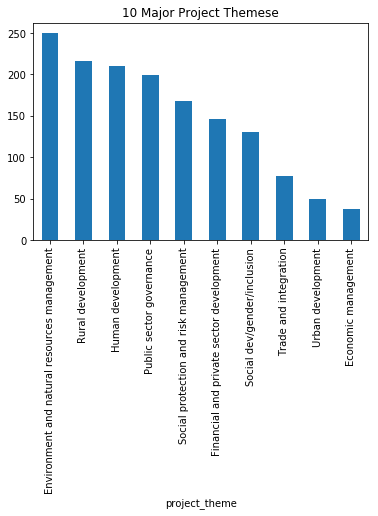

In [21]:
top_10_themes.plot(kind='bar', x='project_theme', y='count', title='10 Major Project Themese', legend=False)

### 3.In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.
Will start by changing unique_codes data frame to a disctionary

In [15]:
unique_dict = unique_codes.to_dict()

#only inside dictionary is needed
unique_dict = unique_dict['name']

Now with help of this dictionary I will add missing theme values in the column themes that was extracted in a previous task

In [16]:
#extracting column in question from data frame
themes = json_data['mjtheme_namecode']

#looping over themes and inside the loop, iterating over each list (each element in themes is a list of dictionaries) and filling missing vallues
for line in themes:
    for item in line:
        if item['name'] == '':
            item['name'] = unique_dict[item['code']]
            

Quick check to ensure all data is filled

In [17]:
clear_codes = pd.DataFrame()
for line in themes:
    codes = json_normalize(line)
    clear_codes = pd.concat([clear_codes, codes])
clear_codes.drop_duplicates()

,code,name
0,8,Human development
1,11,Environment and natural resources management
0,1,Economic management
1,6,Social protection and risk management
0,5,Trade and integration
1,2,Public sector governance
0,7,Social dev/gender/inclusion
1,4,Financial and private sector development
0,10,Rural development
0,9,Urban development


Above table shows that there are no missing values left. Now I will create a new data frame  by copying original json_data one and swapping the mjtheme_namecode for the themes

In [18]:
filled_data = json_data
filled_data['mjtheme_namecode'] = themes